## GROUP 1 - Python - PART 2
* DEL CARPIO CUENCA, GABRIEL SEBASTIAN
* ESPINOSA CALDERON, MAURICIO GUSTAVO
* JAIME MARTINEZ, KEVIN OSWALDO
* MELLIZO ANTAZU, MILAGROS ESTEFANY
* QUISPE ROBLADILLO, ALMENDRA VALERIA

## Part 2: Bootstrapping and Decision Trees (20 points)

3. Consider the Hitters dataset provided by the ISLR package. This dataset contains several features related
to the hitters of the Major League Baseball from the 1986 and 1987 seasons.

In [747]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.utils import resample
from ISLP.models import ModelSpec as MS
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV, train_test_split


In [748]:
hitters = sm.datasets.get_rdataset('Hitters', package='ISLR').data

# Ver las primeras filas
print(hitters.head())


                   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
rownames                                                                        
-Andy Allanson       293    66      1    30   29     14      1     293     66   
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   

                   CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  \
rownames                                                                  
-Andy Allanson          1     30    29      14      A        E      446   
-Alan Ashby            69    321   414     375      N        W      632   
-Alvin Davis           63    224   266     263      A        W      880   
-Andre Dawson         225    828   838     354      N    

In [749]:
hitters = hitters.reset_index(drop=True)
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [750]:
hitters.dropna(inplace=True)
hitters = pd.get_dummies(hitters, drop_first=True)
hitters


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,False,False,False
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,False,False,False


In [751]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    int64  
 1   Hits         263 non-null    int64  
 2   HmRun        263 non-null    int64  
 3   Runs         263 non-null    int64  
 4   RBI          263 non-null    int64  
 5   Walks        263 non-null    int64  
 6   Years        263 non-null    int64  
 7   CAtBat       263 non-null    int64  
 8   CHits        263 non-null    int64  
 9   CHmRun       263 non-null    int64  
 10  CRuns        263 non-null    int64  
 11  CRBI         263 non-null    int64  
 12  CWalks       263 non-null    int64  
 13  PutOuts      263 non-null    int64  
 14  Assists      263 non-null    int64  
 15  Errors       263 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    bool   
 18  Division_W   263 non-null    bool   
 19  NewLeague_N  

In [752]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


In [753]:
hitters.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [754]:
hitters.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

3.1  Generate the dataset such that the categorical variables are transformed to dummies. Make sure you
drop the missing observations if there is any. (2 pts)

In [755]:

model_specification = MS(hitters.columns.drop("Salary")).fit(hitters)
X = model_specification.transform(hitters)
X = X.drop(columns = "intercept")
feature_names = X.columns
X = X.to_numpy()
y = hitters["Salary"]

In [756]:
pd.DataFrame(X, columns = feature_names).head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1.0,1.0,1.0
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0.0,1.0,0.0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1.0,0.0,1.0
3,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1.0,0.0,1.0
4,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0.0,1.0,0.0


3.2 Divide the sample in two sets: training (90%) and testing (10%) sets. (2 pts)

In [757]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 123)


 3.3 Fit an OLS regression to predict the salary of the hitters using all the features of your dataset and
provide bootstrap confidence intervals. 

--  Calculate the OLS point estimate using the training set 
β
^
. (2 pts)

In [758]:
# OLS
ols_model = LinearRegression().fit(X_train, y_train)

beta_hat = np.hstack((ols_model.intercept_, ols_model.coef_))  
y_train2 = y_train.to_numpy()
print("Coeficientes OLS:", beta_hat)

Coeficientes OLS: [199.37211616  -1.28048304   4.27267182  -2.96949204  -1.41103122
   0.88329735   4.72603059 -15.34616661  -0.34009296   1.36823621
   2.13956901   0.76366543  -0.22786579  -0.43049463   0.3468827
   0.32621387  -3.13220799  45.30037431 -99.60403744 -22.90810801]


-- Generate 10,000 Bootstrap Estimates: Use a loop to generate 10,000 bootstrap estimates.

In [759]:
M = 10_000  # Número de repeticiones
variables = X_train.shape[1]
n_samples = len(X_train)

# Matriz para almacenar los coeficientes de cada muestra bootstrap
beta_hat_boost = np.zeros((M, variables))

# Realizamos el bootstrap
for i in range(M):
    # Generamos índices aleatorios con reemplazo para cada muestra bootstrap
    random_index = np.random.choice(n_samples, size=n_samples, replace=True)

    # Generamos la muestra bootstrap
    X_boost = X_train[random_index]
    y_boost = y_train2[random_index]

    # Ajustamos el modelo OLS a la muestra bootstrap
    model_boost = LinearRegression().fit(X_boost, y_boost)

    # Guardamos los coeficientes obtenidos en cada iteración
    beta_hat_boost[i, :] = model_boost.coef_

# Mostrar los coeficientes obtenidos por el bootstrap
print("Coeficientes bootstrap:", beta_hat_boost)


Coeficientes bootstrap: [[  -0.36687421    4.04026087   -7.46009498 ...  132.40805522
  -119.04863698 -110.71100333]
 [  -1.89744977    7.57871779   -6.80829755 ...   66.52303223
   -75.4060234   -23.88910364]
 [  -0.82273667    1.26275177  -14.72065801 ...  164.61980553
   -82.46283052 -144.88512269]
 ...
 [  -0.72509011    2.7989135     5.92683141 ...  187.76985944
   -42.06152652 -150.08933733]
 [  -0.49335839    3.97631055   10.47728521 ...  -96.86550734
   -58.68324055  177.20634109]
 [   0.44974465    0.65112235    2.81762142 ...  102.00346745
  -110.57127281 -103.54811638]]


-- Calculate the 95% confidence intervals

In [760]:
conf_interval_lower = np.percentile(beta_hat_boost, 2.5, axis=0)
conf_interval_upper = np.percentile(beta_hat_boost, 97.5, axis=0)

# Imprimir los intervalos de confianza para cada coeficiente
for i, feature in enumerate(feature_names):
    print(f"Coeficiente: {feature}")
    print(f"Valor estimado: {beta_hat[i]:.4f}")
    print(f"Intervalo de confianza 95%: ({conf_interval_lower[i]:.4f}, {conf_interval_upper[i]:.4f})")
    print()

Coeficiente: AtBat
Valor estimado: 199.3721
Intervalo de confianza 95%: (-2.9846, 0.4152)

Coeficiente: Hits
Valor estimado: -1.2805
Intervalo de confianza 95%: (-2.1303, 10.8602)

Coeficiente: HmRun
Valor estimado: 4.2727
Intervalo de confianza 95%: (-15.8669, 10.9983)

Coeficiente: Runs
Valor estimado: -2.9695
Intervalo de confianza 95%: (-7.9121, 5.1549)

Coeficiente: RBI
Valor estimado: -1.4110
Intervalo de confianza 95%: (-5.0031, 6.5756)

Coeficiente: Walks
Valor estimado: 0.8833
Intervalo de confianza 95%: (0.6962, 8.6669)

Coeficiente: Years
Valor estimado: 4.7260
Intervalo de confianza 95%: (-40.3829, 10.6661)

Coeficiente: CAtBat
Valor estimado: -15.3462
Intervalo de confianza 95%: (-0.7462, 0.0860)

Coeficiente: CHits
Valor estimado: -0.3401
Intervalo de confianza 95%: (-0.6257, 3.2264)

Coeficiente: CHmRun
Valor estimado: 1.3682
Intervalo de confianza 95%: (-1.9467, 6.5498)

Coeficiente: CRuns
Valor estimado: 2.1396
Intervalo de confianza 95%: (-0.9098, 2.5391)

Coeficiente

-- Calculate the out of sample mean squared error of the model

In [761]:
y_pred = ols_model.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)  
mse  

184270.12201056915

3.4  Fit a regression tree to predict the salary using all the features of your dataset. Follow these steps:

* Using the training data, fit a tree and prune it. To choose the prunning parameter, cross validate it as we did in class. (4 pts)

In [762]:
tree_model = DecisionTreeRegressor(random_state = 123)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

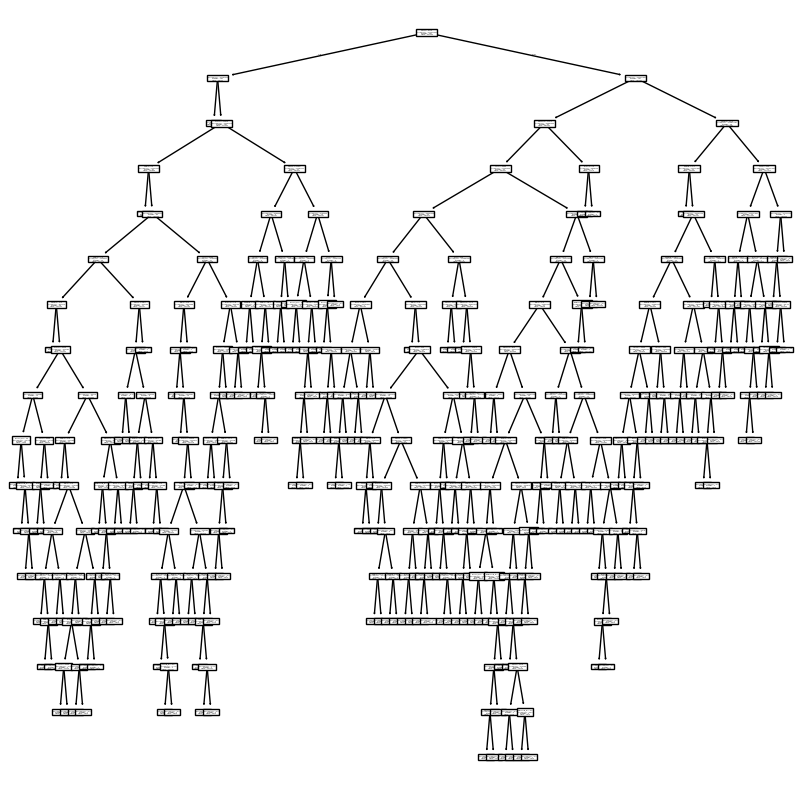

In [763]:
plt.figure(figsize = (10, 10))
_ = plot_tree(tree_model, feature_names = feature_names)

In [764]:
predictions = tree_model.predict(X_test)
np.sqrt(((y_test - predictions) ** 2).mean())

262.0967862256514

In [765]:
# Cross validation
alphas = np.exp(np.linspace(-2, 10, 100))
folds = KFold(3, shuffle=True, random_state=123)
rmses = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=123)
    results = cross_validate(tree, X_train, y_train, cv=folds, scoring="neg_root_mean_squared_error")
    rmses[i] = (-results["test_score"]).mean()

# Obtener el alfa óptimo para la poda
optimal_alpha = alphas[np.argmin(rmses)]
print(f"Alfa óptimo para poda: {optimal_alpha}")

Alfa óptimo para poda: 1355.7650847007772


In [766]:
tree_model_prune = DecisionTreeRegressor(ccp_alpha=optimal_alpha, random_state=1111)
tree_model_prune.fit(X_train, y_train)  

pruned_predictions = tree_model_prune.predict(X_test)

In [767]:
pruned_rmse = np.sqrt(((y_test - pruned_predictions) ** 2).mean())
print(f"RMSE del modelo podado: {pruned_rmse}")

RMSE del modelo podado: 295.8380062305922


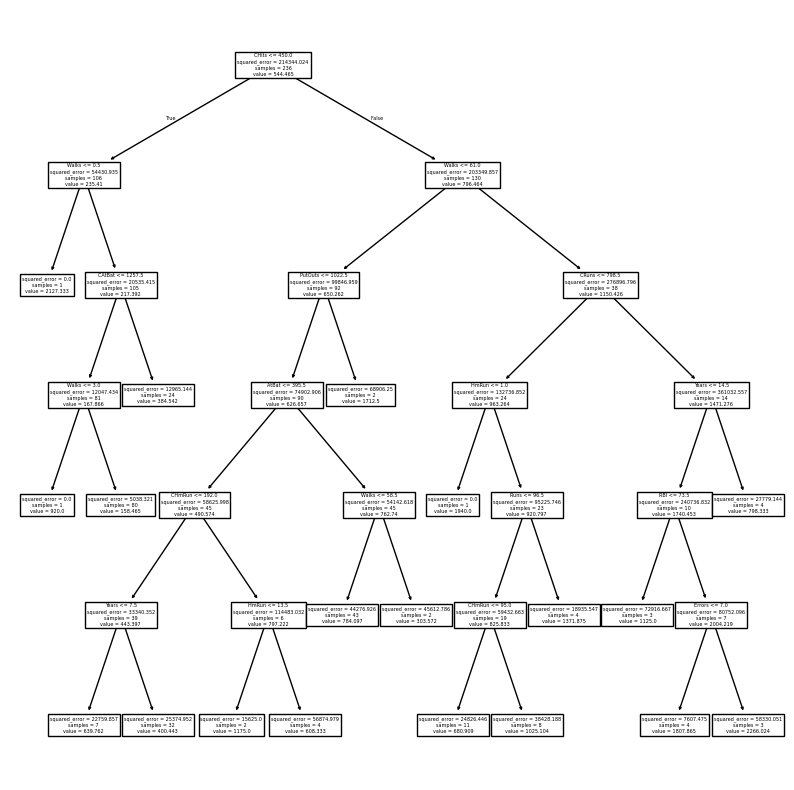

In [768]:
plt.figure(figsize = (10, 10))
_ = plot_tree(tree_model_prune, feature_names = feature_names)

* Calculate the out of sample mean squared error of the model. (2 pts)

In [769]:
y_pred = tree_model.predict(X_test)
# Calcula el MSE 
mse_2 = mean_squared_error(y_test, y_pred)

# Imprime el resultado
print(f"Out of Sample Mean Squared Error: {mse_2}")

Out of Sample Mean Squared Error: 68694.7253498148


3.4 Which model performs better in terms of predictive accuracy? (2 pts)

In [771]:
# Compare OOS MSE for both models
if mse < mse_2:
    print(f"Linear Regression performs better")
else:
    print(f"Regression Tree performs better")


Regression Tree performs better
